In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pgeocode
from genderizerQc import GenderizerQc
import unicodedata
import itertools

# read

In [6]:
# df = pd.read_csv('data_16_03_22.csv')
# df = pd.read_csv('dataAll_17_03_2022.csv')
df = pd.read_csv('data_12_04_2022.csv')

In [7]:
df.dtypes

firstName      object
lastName       object
amount        float64
nbrPayment      int64
entity         object
fiscYear        int64
postalCode     object
city           object
dtype: object

# format columns

## firstName

In [8]:
df.firstName

0          Pieter
1          Émilie
2           Félix
3          Miriam
4          Miriam
           ...   
543282    Michiko
543283       Carl
543284       Carl
543285       Carl
543286    Gaétane
Name: firstName, Length: 543287, dtype: object

In [9]:
df[df.firstName.isna()]

,firstName,lastName,amount,nbrPayment,entity,fiscYear,postalCode,city
5675,NaN,André,385.0,4,P.L.Q./Q.L.P.,2000,NaN,NaN
12125,NaN,Aubé,250.0,1,P.L.Q./Q.L.P.,2000,NaN,NaN
27576,NaN,Beaupré,500.0,1,P.L.Q./Q.L.P.,2000,NaN,NaN
51725,NaN,Boissé,265.0,2,P.L.Q./Q.L.P.,2000,NaN,NaN
65753,NaN,Boulé,300.0,1,P.L.Q./Q.L.P.,2000,NaN,NaN
88842,NaN,Bérubé,300.0,1,P.L.Q./Q.L.P.,2000,NaN,NaN
88848,NaN,Bérubé,1300.0,2,P.L.Q./Q.L.P.,2000,NaN,NaN
88849,NaN,Bérubé,250.0,1,P.L.Q./Q.L.P.,2000,NaN,NaN
88851,NaN,Bérubé,800.0,1,P.L.Q./Q.L.P.,2000,NaN,NaN
99923,NaN,Cauffopé,295.0,3,P.L.Q./Q.L.P.,2000,NaN,NaN


In [10]:
df.dropna(axis=0, subset=['firstName'], inplace=True)

## lastName

In [11]:
df[df.lastName.isna()]

,firstName,lastName,amount,nbrPayment,entity,fiscYear,postalCode,city


## amount

In [12]:
df.amount.describe()

count    543267.000000
mean        281.095985
std         470.029846
min           0.010000
25%          50.000000
50%         100.000000
75%         375.000000
max        3100.000000
Name: amount, dtype: float64

In [13]:
df[df.amount < 1]

,firstName,lastName,amount,nbrPayment,entity,fiscYear,postalCode,city
61699,Eric,Boucher,0.01,1,P.I.,2011,J4W2W3,Brossard
75250,Frédéric,Brisson,0.01,1,C.A.Q.- É.F.L.,2012,J4P1T2,Saint-lambert
87214,François,Bélanger Boisclair,0.01,1,P.I.,2012,H3L2M4,Montréal
110004,Charles,Chauvette,0.01,1,P.I.,2014,J6A4T3,Repentigny
110006,Charles,Chauvette,0.01,1,É.A.,2014,J6A4T3,Repentigny
110007,Charles,Chauvette,0.01,1,P.N.,2014,J6A4T3,Repentigny
110008,Charles,Chauvette,0.01,1,P.Éq,2014,J6A4T3,Repentigny
110009,Charles,Chauvette,0.01,1,C.P.Q. [?]\n,2014,J6A4T3,Repentigny
110011,Charles,Chauvette,0.01,1,P.U.N.,2014,J6A4T3,Repentigny
110012,Charles,Chauvette,0.01,1,B.P.,2014,J6A4T3,Repentigny


## nbrPayment

In [14]:
df[df.nbrPayment < 1].shape

(10442, 8)

In [15]:
df.nbrPayment.replace(-1, 1, inplace=True)

In [16]:
df[df.nbrPayment < 1].shape

(10442, 8)

## entity

In [17]:
df[df.entity.apply(lambda x : '?' in x)].entity.value_counts()

C.A.Q. [?]\n    2267
C.P.Q. [?]\n     592
Name: entity, dtype: int64

In [18]:
df.entity = df.entity.apply(lambda x: x.split('[?]')[0].strip() if '?' in x else x)

In [19]:
df[df.entity.apply(lambda x : '?' in x)]

,firstName,lastName,amount,nbrPayment,entity,fiscYear,postalCode,city


## fiscYear

<AxesSubplot:xlabel='fiscYear'>

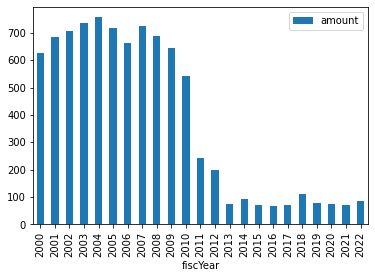

In [20]:
df.loc[:,['fiscYear', 'amount']].groupby('fiscYear').mean().plot(kind='bar')

## zip code

In [21]:
df.postalCode.value_counts(dropna=False)

NaN       167740
J0P1B0       634
J0E2K0       608
J0R1T0       594
J0L1C0       479
           ...  
H9J1V2         1
J9L3A3         1
H1N2Y7         1
H9S5L9         1
G7T0H2         1
Name: postalCode, Length: 65493, dtype: int64

In [22]:
def parseZip(z):
    if pd.isna(z):
        return z
    if (len(z) == 6):
        z = z.upper()
        return z[:3] + ' ' + z[3:]
    else:
        return z
    
    

In [23]:
df.postalCode = df.postalCode.apply(parseZip)

In [24]:
nomi = pgeocode.Nominatim('ca')


In [25]:
nomi.query_location(['Montréal'])

In [26]:
location = nomi.query_postal_code(df.postalCode.values)

In [27]:
df.head()

,firstName,lastName,amount,nbrPayment,entity,fiscYear,postalCode,city
0,Pieter,'s Heeren,100.0,1,C.A.Q.- É.F.L.,2012,J3H 2X5,Mont-saint-hilaire
1,Émilie,A Lachance,100.0,1,P.L.Q./Q.L.P.,2016,H2S 2C5,Montréal
2,Félix,A-Papineau,100.0,1,P.L.Q./Q.L.P.,2015,J0W 1C0,Ferme-neuve
3,Miriam,Aaron,50.0,1,P.L.Q./Q.L.P.,2014,H3G 1L2,Montréal
4,Miriam,Aaron,100.0,1,P.L.Q./Q.L.P.,2013,H3G 1L2,Montréal


In [28]:
location

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,J3H,CA,Beloeil East,Quebec,QC,NaN,NaN,NaN,NaN,45.5527,-73.1755,1.0
1,H2S,CA,Petite-Patrie Southwest,Quebec,QC,Petite-Patrie,NaN,NaN,NaN,45.5354,-73.6061,6.0
2,J0W,CA,Outaouais-Nord (Ferme-Neuve),Quebec,QC,NaN,NaN,NaN,NaN,47.0921,-75.7967,1.0
3,H3G,CA,Downtown Montreal Southeast,Quebec,QC,Montreal,6.0,NaN,NaN,45.4987,-73.5793,1.0
4,H3G,CA,Downtown Montreal Southeast,Quebec,QC,Montreal,6.0,NaN,NaN,45.4987,-73.5793,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
543262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543263,G7Y,CA,Jonquière Southwest,Quebec,QC,Jonquière,NaN,NaN,NaN,48.3701,-71.2358,1.0
543264,G7Y,CA,Jonquière Southwest,Quebec,QC,Jonquière,NaN,NaN,NaN,48.3701,-71.2358,1.0
543265,G7T,CA,Jonquière Southeast,Quebec,QC,Jonquière,NaN,NaN,NaN,48.3975,-71.1527,1.0


In [29]:
df2 = pd.concat([df, location], axis = 1)

### gender

In [30]:
genderDf = pd.read_csv('genderizedNames.csv')
genderDf.drop(columns=['Unnamed: 4'], inplace=True)

In [31]:
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

def findGender(x, dfGender):
    res = genderDf[genderDf['name'].isin([x])]
    if len(res) == 1:
        return res['gender']
    else:
        return 'unknown'

In [32]:
df2['normName'] =  df2['firstName'].astype(str).apply(lambda x : strip_accents(x))

In [33]:
df2 = pd.merge(df2, genderDf.rename(columns={'name':'normName'}), how='left', left_on='normName', right_on='normName', left_index=False, right_index=False)

In [34]:
df2.groupby('gender').count()['firstName']

gender
female     179913
male       354550
unknown     18429
Name: firstName, dtype: int64

In [35]:
df2.to_csv('formatted_data.csv', index=False)

In [36]:
df2.shape

(554303, 24)